In [1]:
import sys
# sys.path.append('/home/ssawmya-local/FM_work/SmartEM/smartem')
import sys
from pathlib import Path

# sys.path.insert(0, str(Path(__file__).parent.parent))
# import smartem

import segmenter, utils
from skimage import measure
import sys

import UNet
import UNet_

import h5py
import matplotlib.pyplot as plt
import torch
import numpy as np
import pyvoi
import pandas as pd
import seaborn as sns
import segmentation_models_pytorch as smp
import segmenter
from tqdm import tqdm
import cv2

In [2]:
data_path = "/storage2/projects/smartEM/em-vis/smartem-data-test.hdf5"

In [17]:
device = torch.device("cuda:4")
model_core = UNet.UNet(1,2)
model_us = UNet_.UNet(1,2)

# model_path = '/home/tommy-local/projects/smartem/SmartEM/pretrained_models/unet_50_1.29e-01.pth'
# model_path = '/home/ssawmya-local/FM_work/smartem_support/fusedem2mb_segformer/unet_50_1.29e-01.pth'
model_path_core = '/home/ssawmya-local/FM_work/smartem_support/fusedem2mb_segformer/em2mb_best.pth'
model_core.load_state_dict(torch.load(model_path_core))

model_path_us = '/home/ssawmya-local/FM_work/smartem_support/fusedem2mb_segformer/unet_50_1.29e-01.pth'
model_us.load_state_dict(torch.load(model_path_us))

Iseg_core = segmenter.Segmenter(model_path_core, segmenter_function = measure.label, device=device)
Iseg_core.set_model(model_class=model_core)

Iseg_us = segmenter.Segmenter(model_path_us, segmenter_function = measure.label, device=device)
Iseg_us.set_model(model_class=model_us)

In [21]:
uint8_clahe = []
uint16_clahe = []
uint8_without_clahe = []
uint16_without_clahe = []


with h5py.File(data_path, "r") as f:
    for reg in tqdm(f.keys()):
        group = f[reg]

        dwts = [int(dwt) for dwt in list(group.keys())]
        dwts.sort()
        # slowest_dwt = dwts[-1]
        fastest_dwt = dwts[0]
        clahe = cv2.createCLAHE(clipLimit=3.0).apply
        im = group[f"{fastest_dwt}/im"][()]
        uint8_without_clahe.append(im)
        uint8_clahe.append(clahe(im))
        uint16_without_clahe.append(im.astype(np.uint16)*255)
        uint16_clahe.append(clahe(im.astype(np.uint16)*255))


        labels_core_uint8_without_clahe = Iseg_core.get_labels(uint8_without_clahe[-1])
        labels_core_uint8_clahe = Iseg_core.get_labels(uint8_clahe[-1])
        labels_core_uint16_without_clahe = Iseg_core.get_labels(uint16_without_clahe[-1])
        labels_core_uint16_clahe = Iseg_core.get_labels(uint16_clahe[-1])



        # uint16_without_clahe.append(group[f"{fastest_dwt}/im"][()])

        # img = clahe(group[str(fastest_dwt)][()])



        # print(slowest_dwt)

100%|██████████| 18/18 [00:29<00:00,  1.63s/it]


In [25]:
uint8_clahe[0].shape
labels_core_uint8_without_clahe.shape

(1632, 1920)

Text(0.5, 1.0, 'uint16 with clahe')

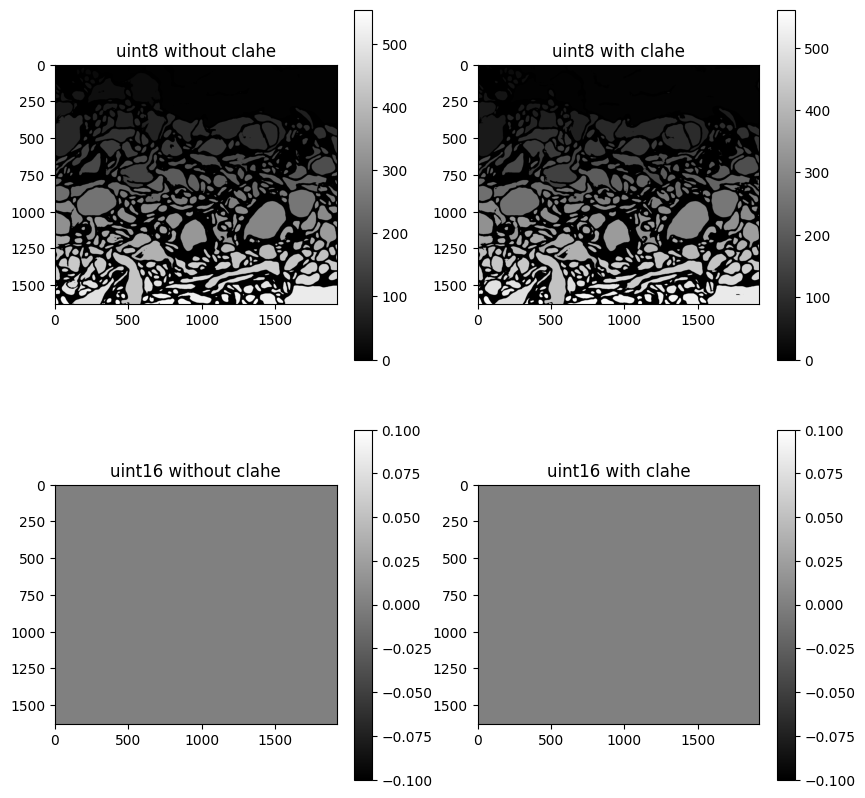

In [22]:
idx = 0
# plot the 4 images in subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
im1 = axs[0, 0].imshow(labels_core_uint8_without_clahe, cmap='gray')
fig.colorbar(im1)
axs[0, 0].set_title('uint8 without clahe')

im2 = axs[0, 1].imshow(labels_core_uint8_clahe, cmap='gray')
fig.colorbar(im2)
axs[0, 1].set_title('uint8 with clahe')

im3 = axs[1, 0].imshow(labels_core_uint16_without_clahe, cmap='gray')
fig.colorbar(im3)
axs[1, 0].set_title('uint16 without clahe')

im4 = axs[1, 1].imshow(labels_core_uint16_clahe, cmap='gray')
fig.colorbar(im4)
axs[1, 1].set_title('uint16 with clahe')

# # put in colorbars
# for ax in axs.flat:
#     ax.label_outer()
#     ax.axis('off')

Text(0.5, 1.0, 'uint16 with clahe')

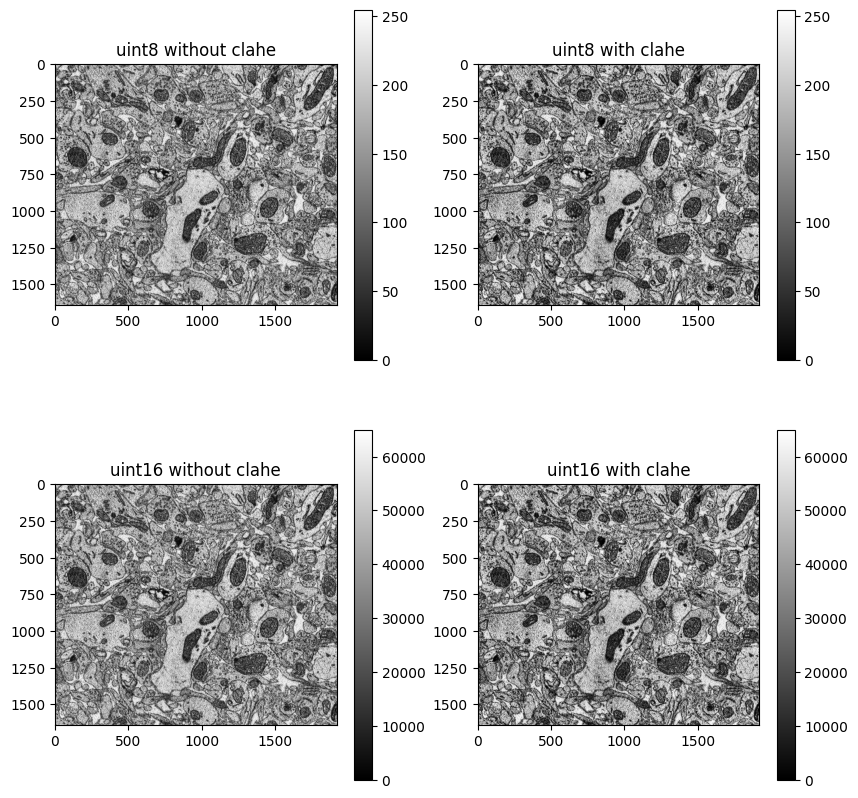

In [13]:
idx = 0
# plot the 4 images in subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
im1 = axs[0, 0].imshow(uint8_without_clahe[idx], cmap='gray')
fig.colorbar(im1)
axs[0, 0].set_title('uint8 without clahe')

im2 = axs[0, 1].imshow(uint8_clahe[idx], cmap='gray')
fig.colorbar(im2)
axs[0, 1].set_title('uint8 with clahe')

im3 = axs[1, 0].imshow(uint16_without_clahe[idx], cmap='gray')
fig.colorbar(im3)
axs[1, 0].set_title('uint16 without clahe')

im4 = axs[1, 1].imshow(uint16_clahe[idx], cmap='gray')
fig.colorbar(im4)
axs[1, 1].set_title('uint16 with clahe')

# # put in colorbars
# for ax in axs.flat:
#     ax.label_outer()
#     ax.axis('off')